Sınıf dengesizliğine sahip kalp krizi riski'ne ilişkin veri kümesini kullanarak:

Lojistik Regresyon modeli oluşturup modelinizin performansını ölçün,
Değişik yöntemler ve sınıf oranlarını deneyerek, sınıf dengesizliğinin üstesinden gelin ve performansı en yüksek yöntemi ve sınıflar arası oranı belirleyin.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cleveland-0_vs_4.csv")

In [3]:
df=data.copy()

In [4]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [6]:
df["ca"].unique()

array(['0.0', '2.0', '1.0', '3.0', '<null>'], dtype=object)

In [7]:
df["thal"].unique()

array(['6.0', '3.0', '7.0', '<null>'], dtype=object)

In [8]:
df["ca"] = df["ca"].str.replace('.','')

In [9]:
df["ca"] = df["ca"].apply(str.strip).replace('<null>', np.nan)

In [10]:
df["ca"].unique()

array(['00', '20', '10', '30', nan], dtype=object)

In [11]:
df["ca"] = pd.to_numeric(df["ca"], downcast="float")
#df["ca"] = df.ca.astype(float)

In [12]:
df["ca"].unique()

array([ 0., 20., 10., 30., nan], dtype=float32)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        174 non-null    float32
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float32(1), float64(11), object(2)
memory usage: 18.8+ KB


In [14]:
df["thal"] = df["thal"].str.replace('.','')

In [15]:
df["thal"] = df["thal"].apply(str.strip).replace('<null>', np.nan)

In [16]:
df["thal"] = pd.to_numeric(df["thal"], downcast="float")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        174 non-null    float32
 12  thal      176 non-null    float32
 13  num       177 non-null    object 
dtypes: float32(2), float64(11), object(1)
memory usage: 18.1+ KB


In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        1
num         0
dtype: int64

In [19]:
df.dropna(subset=['ca', 'thal'],inplace=True)


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [21]:
def kategorize_et(num):
    if num == "negative":
        return 0
    else:
        return 1

#y=data["num"]


In [22]:
df['num'] = df['num'].apply(kategorize_et)

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,60.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,30.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,30.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,30.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,30.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,20.0,60.0,1
173,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,70.0,1
174,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,10.0,30.0,1
175,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,30.0,60.0,1


In [24]:
y=df["num"]
X=df.drop("num",axis=1)

Negatifler(kalp krizi riski düşük olanlar) : %7.51
Pozitifler(kalp krizi riski yüksek olanlar)    : %92.49


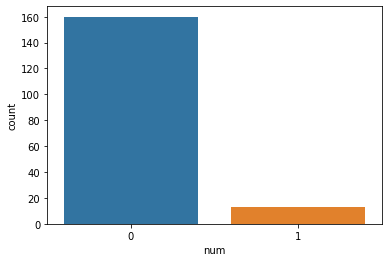

In [25]:
sns.countplot(y)
print("Negatifler(kalp krizi riski düşük olanlar) : %{:.2f}".format(sum(y)/len(y)*100))
print("Pozitifler(kalp krizi riski yüksek olanlar)    : %{:.2f}".format((len(y)-sum(y))/len(y)*100))

In [26]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_egitim, y_egitim)
tahmin_eğitim = model.predict(X_egitim)
tahmin_test = model.predict(X_test)
print(model.score(X_test, y_test))
print(model.score(X_egitim,y_egitim))

0.8857142857142857
0.9855072463768116


In [28]:
def model_olustur(X, y):
    #X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [29]:
model_olustur(X,y)

Modelin doğruluk değeri :  0.9428571428571428
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       129
           1       0.83      0.56      0.67         9

    accuracy                           0.96       138
   macro avg       0.90      0.77      0.82       138
weighted avg       0.96      0.96      0.96       138

Test veri kümesi
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.50      0.67         4

    accuracy                           0.94        35
   macro avg       0.97      0.75      0.82        35
weighted avg       0.95      0.94      0.93        35



In [30]:
y.value_counts()

0    160
1     13
Name: num, dtype: int64

Sınıf dengesizliğini örneklem artırarak yapalım. 1 olan pozitifler veri kümesinde çok az.

In [31]:
from sklearn.utils import resample

In [32]:
kalpkrizi_pozitif = df[df.num == 1]
kalpkrizi_negatif = df[df.num == 0]

kalpkrizi_pozitif_artırılmış = resample(kalpkrizi_pozitif,
                                     replace = True,
                                     n_samples = len(kalpkrizi_negatif),
                                     random_state = 111)

artırılmıs_df = pd.concat([kalpkrizi_negatif, kalpkrizi_pozitif_artırılmış])
artırılmıs_df.num.value_counts()

1    160
0    160
Name: num, dtype: int64

In [33]:
X = artırılmıs_df.drop('num', axis=1)
y = artırılmıs_df['num']
model_olustur(X,y)

Modelin doğruluk değeri :  0.96875
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       127
           1       0.95      1.00      0.97       129

    accuracy                           0.97       256
   macro avg       0.97      0.97      0.97       256
weighted avg       0.97      0.97      0.97       256

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        31

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



1 olan da tüm değerlerin bir önceki model performansına göre arttığını görüyoruz.

Örneklem Azaltmak veri sayısı azlığından mantıklı değil.

Smote ve adasyn deneyelim.

In [34]:
from imblearn.over_sampling import SMOTE
#pip install imblearn
#pip install -U imbalanced-learn

In [38]:
y = df.num
X = df.drop('num', axis=1)

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X, y)

In [39]:
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.96875
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       127
           1       0.97      1.00      0.98       129

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        31

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



In [40]:
from imblearn.over_sampling import ADASYN

In [41]:
y = df.num
X = df.drop('num', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_resample(X, y)

In [42]:
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.96875
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       127
           1       0.97      1.00      0.98       129

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

Test veri kümesi
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        31

    accuracy                           0.97        64
   macro avg       0.97      0.97      0.97        64
weighted avg       0.97      0.97      0.97        64



Sonuçları karşılaştıralım:
Smote ve adasyn sonuçları aynı çıkmış ancak bunlar örneklem artırmaya göre daha iyi çıkmış.
